In [ ]:
%pip install python-igraph

In [ ]:
%pip install -q scikit-image

In [2]:
import scanpy as sc
import anndata as ad


In [3]:
s1d1 = sc.read_10x_h5('scverse_tutorials/s1d1_filtered_feature_bc_matrix.h5')
s1d3 = sc.read_10x_h5('scverse_tutorials/s1d3_filtered_feature_bc_matrix.h5')

/Users/mac/apps/python/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/mac/apps/python/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/mac/apps/python/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/mac/apps/python/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
s1d1.var_names_make_unique()
s1d3.var_names_make_unique()

In [5]:
s1d1

AnnData object with n_obs × n_vars = 8785 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

In [6]:
s1d3

AnnData object with n_obs × n_vars = 8340 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

In [7]:
# 合并样本
adatas = {}
adatas['s1d1'] = s1d1
adatas['s1d3'] = s1d3

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()

/Users/mac/apps/python/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

In [9]:
# 质量控制
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['ribo'] = adata.var_names.str.startswith(('RPS', 'RPL'))
adata.var['hb'] = adata.var_names.str.contains("^HB[^(P)]")

In [10]:
adata.var

,mt,ribo,hb
MIR1302-2HG,False,False,False
FAM138A,False,False,False
OR4F5,False,False,False
AL627309.1,False,False,False
AL627309.3,False,False,False
...,...,...,...
AC141272.1,False,False,False
AC023491.2,False,False,False
AC007325.1,False,False,False
AC007325.4,False,False,False


In [11]:
adata.var[adata.var.mt]
#print(adata.var[adata.var.ribo])
#print(adata.var[adata.var.hb])

,mt,ribo,hb
MT-ND1,True,False,False
MT-ND2,True,False,False
MT-CO1,True,False,False
MT-CO2,True,False,False
MT-ATP8,True,False,False
MT-ATP6,True,False,False
MT-CO3,True,False,False
MT-ND3,True,False,False
MT-ND4L,True,False,False
MT-ND4,True,False,False


In [12]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=['mt', 'ribo', 'hb'], inplace=True, log1p=True
)
print(adata)

AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'


In [13]:
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,False,False,False,1,0.000058,0.000058,99.994161,1.0,0.693147
FAM138A,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,False,False,False,40,0.002336,0.002333,99.766423,40.0,3.713572
AL627309.3,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294
...,...,...,...,...,...,...,...,...,...
AC141272.1,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294
AC023491.2,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.1,False,False,False,1,0.000058,0.000058,99.994161,1.0,0.693147
AC007325.4,False,False,False,111,0.006599,0.006577,99.351825,113.0,4.736198


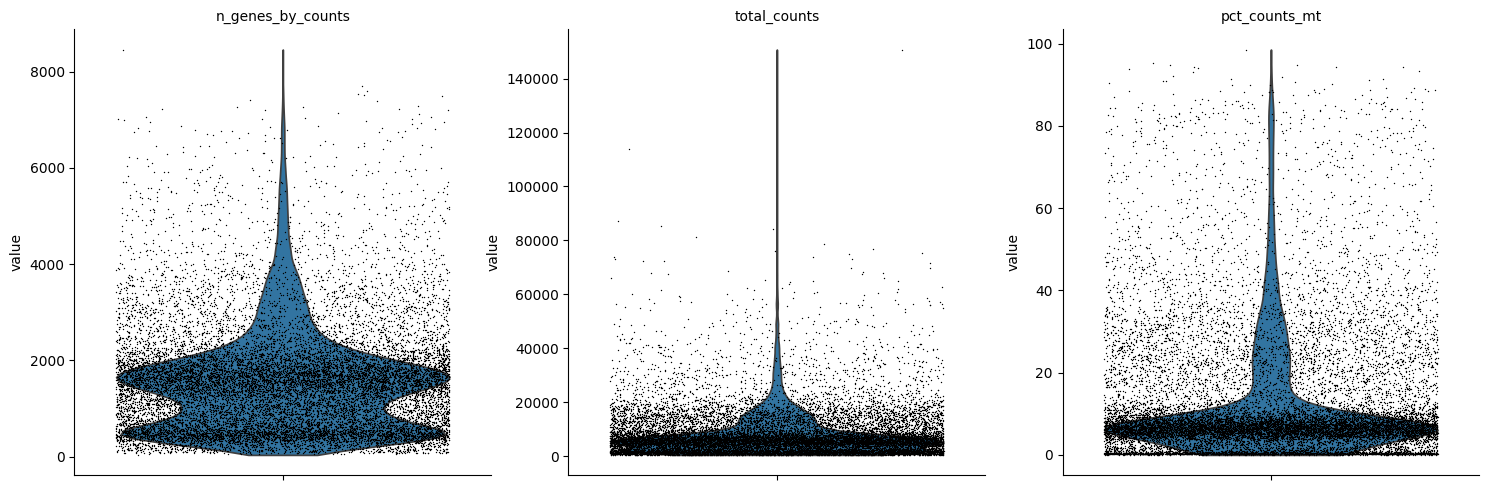

In [14]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    save=True,
)

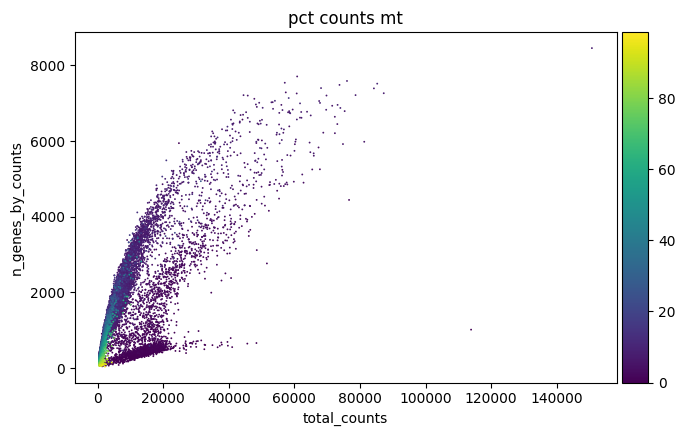

In [15]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt", save=True)

In [16]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [17]:
#min(adata.obs.n_genes)
min(adata.var.n_cells)

3

In [18]:
# 双胞检测
sc.pp.scrublet(adata, batch_key="sample")

In [19]:
# 标准化
# 每一个细胞内总的计数 / 每一个细胞内总的计数的中位数
# 再进行 log1p 转换
#adata.to_df().to_csv('adata_flt.tsv', sep='\t', index=False)
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata)
#print(adata.to_df())
sc.pp.log1p(adata)

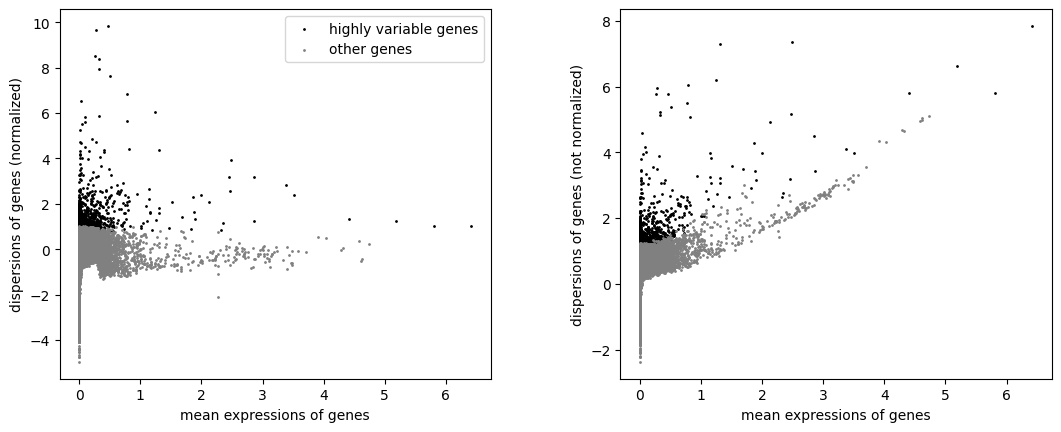

In [20]:
# 特征选择
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")
sc.pl.highly_variable_genes(adata, save=True)

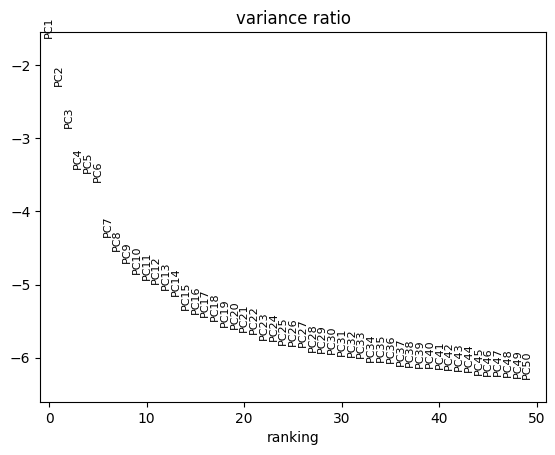

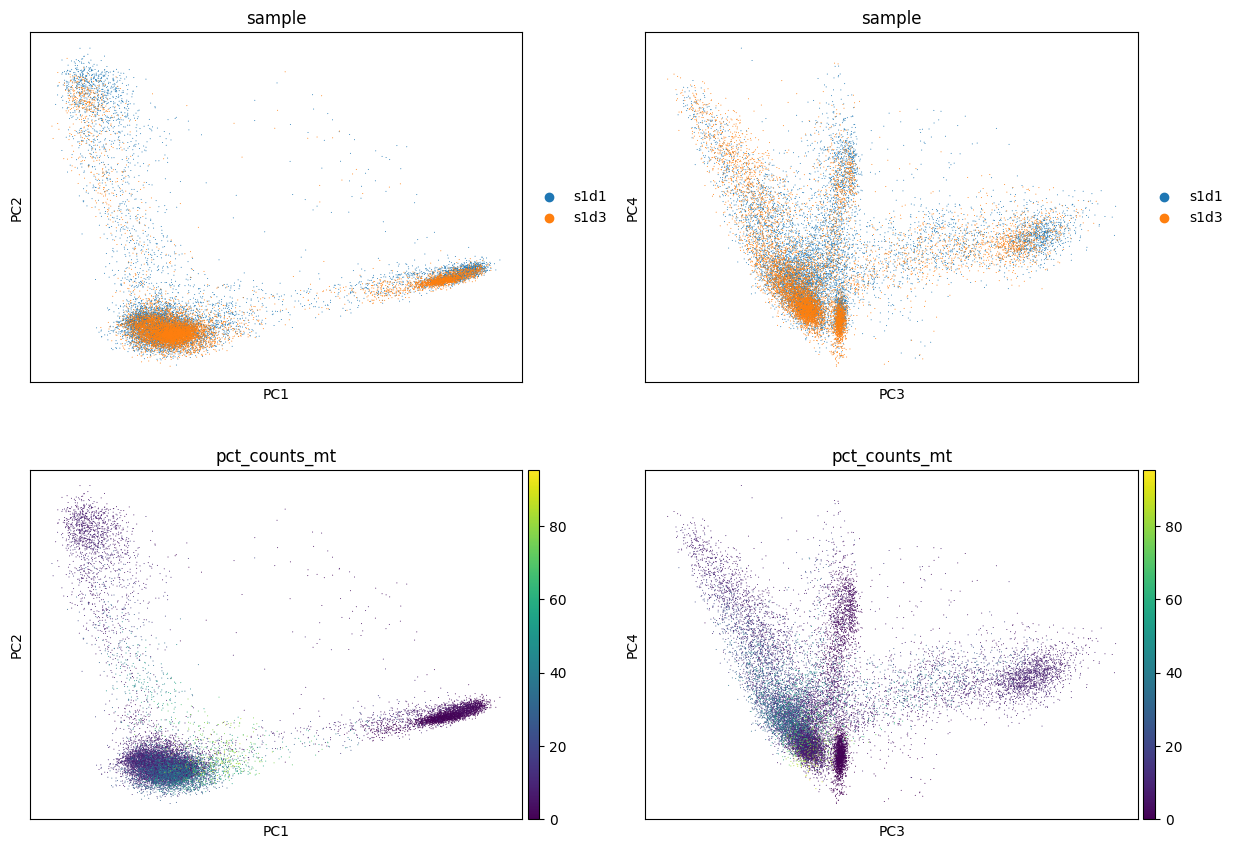

In [21]:
# 降维
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True, save=True)
sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
    save=True,
)

/Users/mac/apps/python/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'sample_colors', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'
AnnData object with n_obs × n_vars

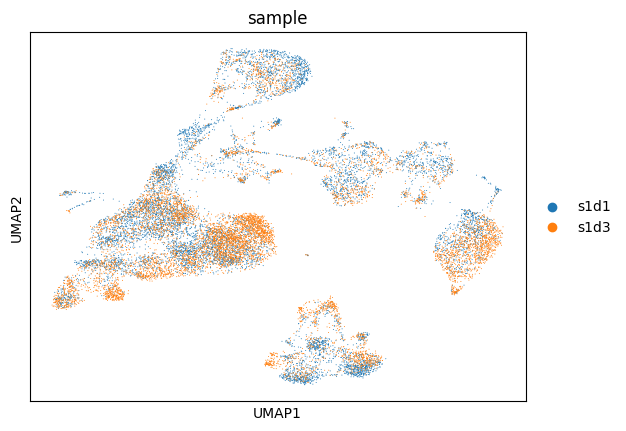

In [22]:
# 最近邻图构建和可视化
sc.pp.neighbors(adata)
print(adata)
sc.tl.umap(adata)
print(adata)
sc.pl.umap(
    adata,
    color="sample",
    size=2,
    save=True,
)

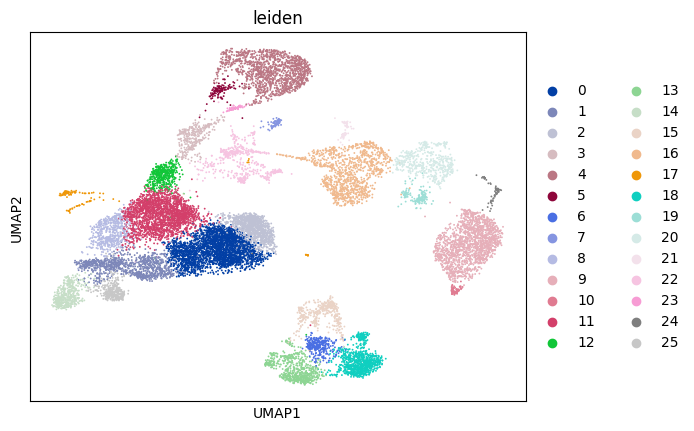

In [24]:
# 聚类
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
sc.pl.umap(adata, color=["leiden"], save=True)

In [ ]:
# 重新评估质量控制和细胞过滤
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    wspace=0.5,
    size=3,
    save='-re-assess',
)

sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace=0.5,
    ncols=2,
    save='-re-assess2',
)

In [ ]:
# 手动细胞类型注释
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
    save="-ann",
)

In [ ]:
# 标记基因集
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}

sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.02", standard_scale="var", save="0.02")

In [ ]:
adata.obs["cell_type_lvl1"] = adata.obs["leiden_res_0.02"].map(
    {
        "0": "Lymphocytes",
        "1": "Monocytes",
        "2": "Erythroid",
        "3": "B Cells",
    }
)
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.50", standard_scale="var", save="0.50")

In [ ]:
# 差异表达基因作为标记基因
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5, save="rank"
)
print(adata)

dc_cluster_genes = sc.get.rank_genes_groups_df(adata, group="7").head(5)["names"]
sc.pl.umap(
    adata,
    color=[*dc_cluster_genes, "leiden_res_0.50"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
    save="group-7"
)